In [1]:
# Imports
import sys

from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


In [2]:
class MnistLSTMClassifier(object):
    def __init__(self):
        # Classifier
        self.time_steps=28 # timesteps to unroll
        self.n_units=128 # hidden LSTM units
        self.n_inputs=28 # rows of 28 pixels (an mnist img is 28x28)
        self.n_classes=10 # mnist classes/labels (0-9)
        self.batch_size=128 # Size of each batch
        self.n_epochs=10
        # Internal
        self._data_loaded = False
        self._trained = False

    def __create_model(self):
        self.model = Sequential()
        self.model.add(LSTM(self.n_units, input_shape=(self.time_steps, self.n_inputs)))
        self.model.add(Dense(self.n_classes, activation='softmax'))

        self.model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

    def __load_data(self):
        self.mnist = input_data.read_data_sets("mnist", one_hot=True)
        self._data_loaded = True

    def train(self, save_model=False):
        self.__create_model()
        if self._data_loaded == False:
            self.__load_data()

        x_train = [x.reshape((-1, self.time_steps, self.n_inputs)) for x in self.mnist.train.images]
        x_train = np.array(x_train).reshape((-1, self.time_steps, self.n_inputs))
        
        x_test = [x.reshape((-1, self.time_steps, self.n_inputs)) for x in self.mnist.test.images]
        x_test = np.array(x_test).reshape((-1, self.time_steps, self.n_inputs))

        self.history = self.model.fit(x_train, self.mnist.train.labels,validation_data=(x_test, self.mnist.test.labels),
                  batch_size=self.batch_size, epochs=self.n_epochs, shuffle=False)

        self._trained = True
        
        if save_model:
            self.model.save("./saved_model/lstm-model.h5")

    def evaluate(self, model=None):
        if self._trained == False and model == None:
            errmsg = "[!] Error: classifier wasn't trained or classifier path is not precised."
            print(errmsg, file=sys.stderr)
            sys.exit(0)

        if self._data_loaded == False:
            self.__load_data()

        x_test = [x.reshape((-1, self.time_steps, self.n_inputs)) for x in self.mnist.test.images]
        x_test = np.array(x_test).reshape((-1, self.time_steps, self.n_inputs))

        model = load_model(model) if model else self.model
        test_loss = model.evaluate(x_test, self.mnist.test.labels)
        print("LSTM Error: %.2f%%" % (100-test_loss[1]*100))
        
    def _print_summary(self):
        self.model.summary()


In [3]:
lstm_classifier = MnistLSTMClassifier()

In [4]:
lstm_classifier.train(save_model=True)

Extracting mnist\train-images-idx3-ubyte.gz
Extracting mnist\train-labels-idx1-ubyte.gz
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz
Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 58s - loss: 0.6402 - acc: 0.7897 - val_loss: 0.5594 - val_acc: 0.8198
Epoch 2/10
55000/55000 [==============================] - 57s - loss: 0.1893 - acc: 0.9424 - val_loss: 0.3914 - val_acc: 0.8808
Epoch 3/10
55000/55000 [==============================] - 57s - loss: 0.1207 - acc: 0.9639 - val_loss: 0.1083 - val_acc: 0.9656
Epoch 4/10
55000/55000 [==============================] - 56s - loss: 0.0863 - acc: 0.9742 - val_loss: 0.0849 - val_acc: 0.9721
Epoch 5/10
55000/55000 [==============================] - 57s - loss: 0.0680 - acc: 0.9792 - val_loss: 0.0917 - val_acc: 0.9715
Epoch 6/10
55000/55000 [==============================] - 59s - loss: 0.0550 - acc: 0.9829 - val_loss: 0.0756 - val_acc: 0.9770
Epoch 7/

In [5]:
lstm_classifier._print_summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [7]:
lstm_classifier.evaluate()

 9952/10000 [============================>.] - ETA: 0sLSTM Error: 1.54%


dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])


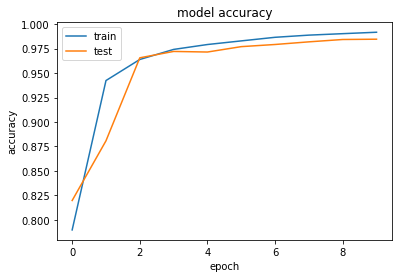

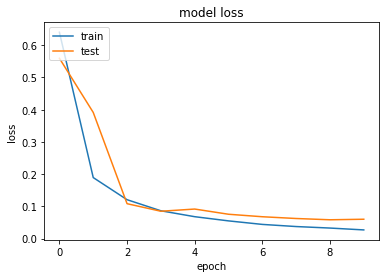

In [8]:
history = lstm_classifier.history
from matplotlib import pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()